In [1]:
print(__doc__)

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
%matplotlib inline

# Loads the data from the two csv need for clustering (weather_data_categorized, minutes_categorize)
cluster_data = pd.read_csv("C:/Users/Vi/Desktop/CMPE 188/Bikeshare-master/Data/weather_data_categorized.csv")
minutes_data = pd.read_csv("C:/Users/Vi/Desktop/CMPE 188/Bikeshare-master/Data/minutes_categorize.csv")

Automatically created module for IPython interactive environment


In [2]:
# Drops the unnecessary column. Visualize our cluster_data.
cluster_data.drop("Unnamed: 0", axis=1, inplace=True)
cluster_data

,Date,MeanTemperatureF,MeanHumidity,PrecipitationIn,CloudCover,Events,zip,CloudDesc,PrecipDesc
0,8/29/2013,72,69,0.000,4,NaN,95113,Cloudy,None
1,8/30/2013,76,65,0.000,2,NaN,95113,Little Cloudy,None
2,8/31/2013,71,66,0.000,0,NaN,95113,Clear,None
3,9/1/2013,72,62,0.000,2,NaN,95113,Little Cloudy,None
4,9/2/2013,73,68,0.001,5,Rain,95113,Very Cloudy,None
5,9/3/2013,70,58,0.000,1,NaN,95113,Clear,None
6,9/4/2013,69,62,0.000,1,NaN,95113,Clear,None
7,9/5/2013,68,60,0.000,1,NaN,95113,Clear,None
8,9/6/2013,72,54,0.000,0,NaN,95113,Clear,None
9,9/7/2013,78,45,0.000,0,NaN,95113,Clear,None


In [3]:
# Visualize our minutes_data dataset to see if we need to make changes.
minutes_data

,Date,NumRides,TotalMinutes,MinCategorize
0,1/1/2014,359,16462,15000 to 24999
1,1/1/2015,181,6382,4000 to 7499
2,1/1/2016,98,4039,4000 to 7499
3,1/10/2014,983,13948,10000 to 14999
4,1/10/2015,362,14389,10000 to 14999
5,1/10/2016,133,3504,2000 to 3999
6,1/11/2014,247,12293,10000 to 14999
7,1/11/2015,327,9229,7500 to 9999
8,1/11/2016,1060,10649,10000 to 14999
9,1/12/2014,351,16102,15000 to 24999


In [4]:
# We notice that the dates from both the data set does not match up, we have to fix that before we can use the dataset.
pd.to_datetime(minutes_data['Date']).sort_values().index
minutes_data = minutes_data.ix[pd.to_datetime(minutes_data['Date']).sort_values().index]
minutes_data = minutes_data.reset_index(drop=True)

In [5]:
# After sorting the dates from the dataset we can double check if the numbers are correct.
minutes_data

,Date,NumRides,TotalMinutes,MinCategorize
0,8/29/2013,748,19464,15000 to 24999
1,8/30/2013,714,32167,25000 to 49999
2,8/31/2013,640,39041,25000 to 49999
3,9/1/2013,706,40076,25000 to 49999
4,9/2/2013,661,25727,25000 to 49999
5,9/3/2013,597,17351,15000 to 24999
6,9/4/2013,606,17895,15000 to 24999
7,9/5/2013,677,16070,15000 to 24999
8,9/6/2013,814,22249,15000 to 24999
9,9/7/2013,796,32397,25000 to 49999


In [6]:
# After we made sure the data is correct, we append the Number of Rides and the Total Minutes from the minutes_data into our
# cluster_data dataset. These are needed when we do clustering.

cluster_data['NumRides'] = minutes_data['NumRides']
cluster_data['TotalMinutes'] = minutes_data['TotalMinutes']


In [7]:
# Visualize our new dataset with the new columns.
cluster_data

,Date,MeanTemperatureF,MeanHumidity,PrecipitationIn,CloudCover,Events,zip,CloudDesc,PrecipDesc,NumRides,TotalMinutes
0,8/29/2013,72,69,0.000,4,NaN,95113,Cloudy,None,748,19464
1,8/30/2013,76,65,0.000,2,NaN,95113,Little Cloudy,None,714,32167
2,8/31/2013,71,66,0.000,0,NaN,95113,Clear,None,640,39041
3,9/1/2013,72,62,0.000,2,NaN,95113,Little Cloudy,None,706,40076
4,9/2/2013,73,68,0.001,5,Rain,95113,Very Cloudy,None,661,25727
5,9/3/2013,70,58,0.000,1,NaN,95113,Clear,None,597,17351
6,9/4/2013,69,62,0.000,1,NaN,95113,Clear,None,606,17895
7,9/5/2013,68,60,0.000,1,NaN,95113,Clear,None,677,16070
8,9/6/2013,72,54,0.000,0,NaN,95113,Clear,None,814,22249
9,9/7/2013,78,45,0.000,0,NaN,95113,Clear,None,796,32397


In [8]:
# Our classifers are in a string form, we need to convert them to intergers for our clustering.
cloud_status = {'Clear': '0', 'Little Cloudy': '1', 'Cloudy': '2', 'Very Cloudy': '3', 'Overcast': '4'}
cluster_data['CloudDesc'] = cluster_data['CloudDesc'].map(cloud_status)
precip_status = {'None': '0', 'Light': '1', 'Medium': '2', 'Pouring': '3', 'Heavy': '4'}         
cluster_data['PrecipDesc'] = cluster_data['PrecipDesc'].map(precip_status)

cluster_data['CloudDesc'] = cluster_data['CloudDesc'].astype(np.int32)
cluster_data['PrecipDesc'] = cluster_data['PrecipDesc'].astype(np.int32)


In [9]:
# Verify our dataset before selecting our inputs and our classifiers 
cluster_data

,Date,MeanTemperatureF,MeanHumidity,PrecipitationIn,CloudCover,Events,zip,CloudDesc,PrecipDesc,NumRides,TotalMinutes
0,8/29/2013,72,69,0.000,4,NaN,95113,2,0,748,19464
1,8/30/2013,76,65,0.000,2,NaN,95113,1,0,714,32167
2,8/31/2013,71,66,0.000,0,NaN,95113,0,0,640,39041
3,9/1/2013,72,62,0.000,2,NaN,95113,1,0,706,40076
4,9/2/2013,73,68,0.001,5,Rain,95113,3,0,661,25727
5,9/3/2013,70,58,0.000,1,NaN,95113,0,0,597,17351
6,9/4/2013,69,62,0.000,1,NaN,95113,0,0,606,17895
7,9/5/2013,68,60,0.000,1,NaN,95113,0,0,677,16070
8,9/6/2013,72,54,0.000,0,NaN,95113,0,0,814,22249
9,9/7/2013,78,45,0.000,0,NaN,95113,0,0,796,32397


In [10]:
# Sets the choose the approriate inputs for the dataset we are trying to cluster 
x = cluster_data.filter(items=['MeanTemperatureF', 'MeanHumidity ', 'PrecipitationIn ', 'CloudCover ', 'NumRides', 'TotalMinutes'])
x.columns = ['MeanTemperatureF','MeanHumidity','PrecipitationIn','CloudCover','NumRides','TotalMinutes']

In [11]:
# Sets the classifers for the dataset we are trying to cluster
y = cluster_data.filter(items=['CloudDesc', 'PrecipDesc'])
y.columns = ['CloudDesc', 'PrecipDesc']

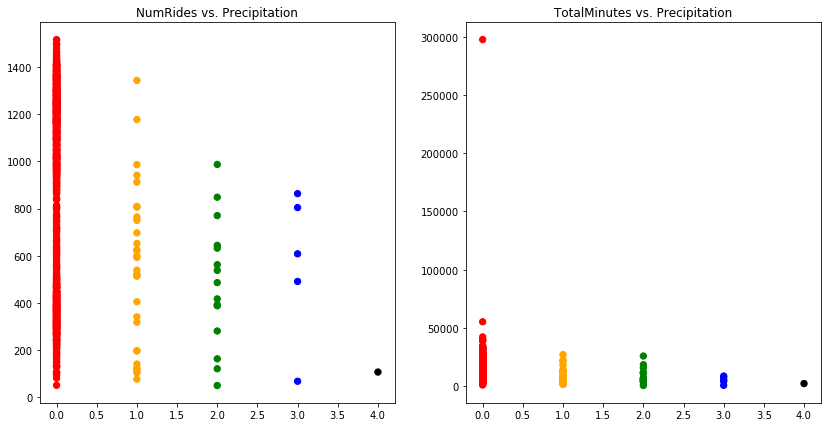

In [78]:
# We need to visualize the results for Precipitation

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap (5, 1 for each states represented from 0-4. E.g.'None': '0', 'Light': '1', 'Medium': '2', 'Pouring': '3', 'Heavy': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])
 
# Plot Numbers of Rides vs. Precipitation
plt.subplot(1, 2, 1)
plt.scatter(y.PrecipDesc, x.NumRides, c=colormap[y.PrecipDesc], s=40)
plt.title('NumRides vs. Precipitation')

# Plot Total Minutes Ridden vs. Precipitation
plt.subplot(1, 2, 2)
plt.scatter(y.PrecipDesc, x.TotalMinutes, c=colormap[y.PrecipDesc], s=40)
plt.title('TotalMinutes vs. Precipitation')

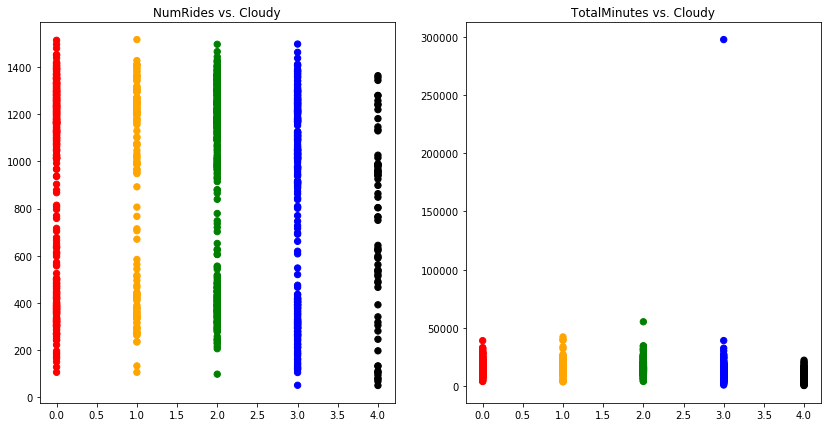

In [77]:
# We need to visualize the results for Cloudy

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap (5, 1 for each states represented from 0-4. E.g.'Clear': '0', 'Little Cloudy': '1', 'Cloudy': '2', 'Very Cloudy': '3', 'Overcast': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])
 
# Plot Numbers of Rides vs. Cloudy
plt.subplot(1, 2, 1)
plt.scatter(y.CloudDesc, x.NumRides, c=colormap[y.CloudDesc], s=40)
plt.title('NumRides vs. Cloudy')

# Plot Total Minutes Ridden vs. Cloudy
plt.subplot(1, 2, 2)
plt.scatter(y.CloudDesc, x.TotalMinutes, c=colormap[y.CloudDesc], s=40)
plt.title('TotalMinutes vs. Cloudy')

In [34]:
# Setting up the K-Means Model
model = KMeans(n_clusters=5)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [35]:
# Since it is unsupervised, this is the K-Means thinks
model.labels_

array([0, 3, 3, ..., 4, 4, 4])

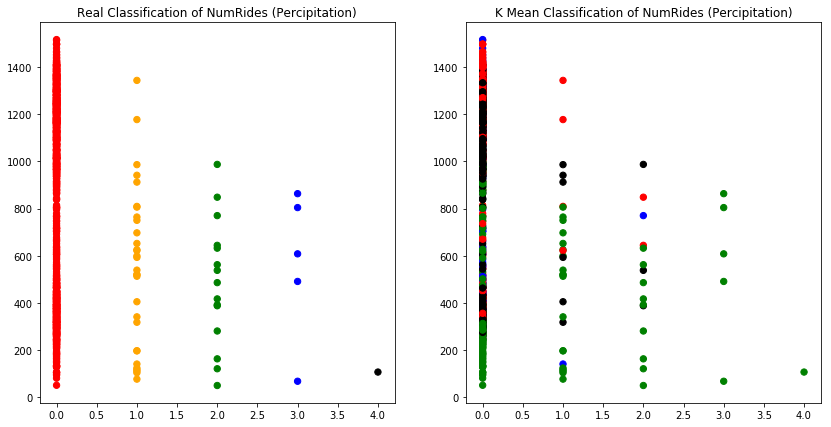

In [79]:
# Now we compare the results of K-Means to our Real Classification for Number of Rides (Percipitation).

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap (5, 1 for each states represented from 0-4. E.g.'None': '0', 'Light': '1', 'Medium': '2', 'Pouring': '3', 'Heavy': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])

# Plot the Original Classifications for NumRides
plt.subplot(1, 2, 1)
plt.scatter(y.PrecipDesc, x.NumRides, c=colormap[y.PrecipDesc], s=40)
plt.title('Real Classification of NumRides (Percipitation)')

# Plot the Models Classifications for NumRides
plt.subplot(1, 2, 2)
plt.scatter(y.PrecipDesc, x.NumRides, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification of NumRides (Percipitation)')

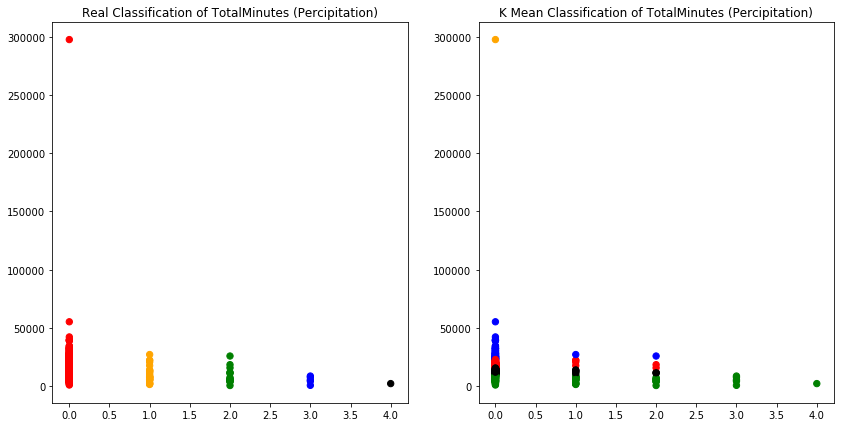

In [80]:
# This is the 2nd result of K-Means to our Real Classification but this time for Total Minutes ridden (Percipitation).

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap (5, 1 for each states represented from 0-4. E.g.'None': '0', 'Light': '1', 'Medium': '2', 'Pouring': '3', 'Heavy': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])

# Plot the Original Classifications for TotalMinutes
plt.subplot(1, 2, 1)
plt.scatter(y.PrecipDesc, x.TotalMinutes, c=colormap[y.PrecipDesc], s=40)
plt.title('Real Classification of TotalMinutes (Percipitation)')

# Plot the Models Classifications for TotalMinutes
plt.subplot(1, 2, 2)
plt.scatter(y.PrecipDesc, x.TotalMinutes, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification of TotalMinutes (Percipitation)')

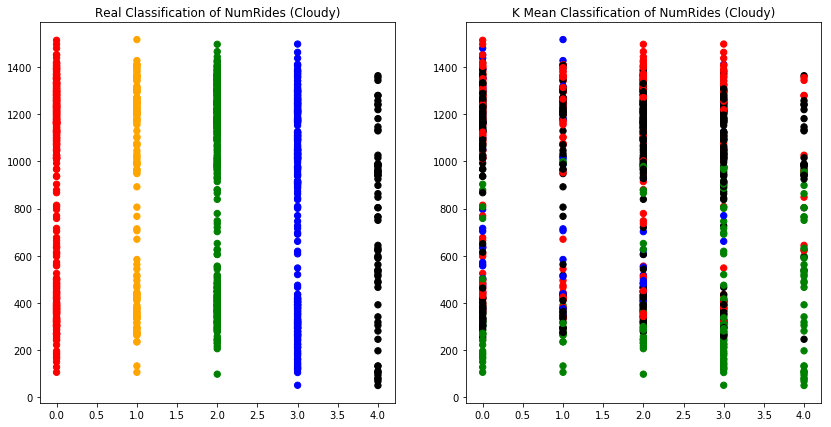

In [81]:
# Now we compare the results of K-Means to our Real Classification for Number of Rides (Cloudy).

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap (5, 1 for each states represented from 0-4. E.g.'Clear': '0', 'Little Cloudy': '1', 'Cloudy': '2', 'Very Cloudy': '3', 'Overcast': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])

# Plot the Original Classifications for NumRides
plt.subplot(1, 2, 1)
plt.scatter(y.CloudDesc, x.NumRides, c=colormap[y.CloudDesc], s=40)
plt.title('Real Classification of NumRides (Cloudy)')

# Plot the Models Classifications for NumRides
plt.subplot(1, 2, 2)
plt.scatter(y.CloudDesc, x.NumRides, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification of NumRides (Cloudy)')

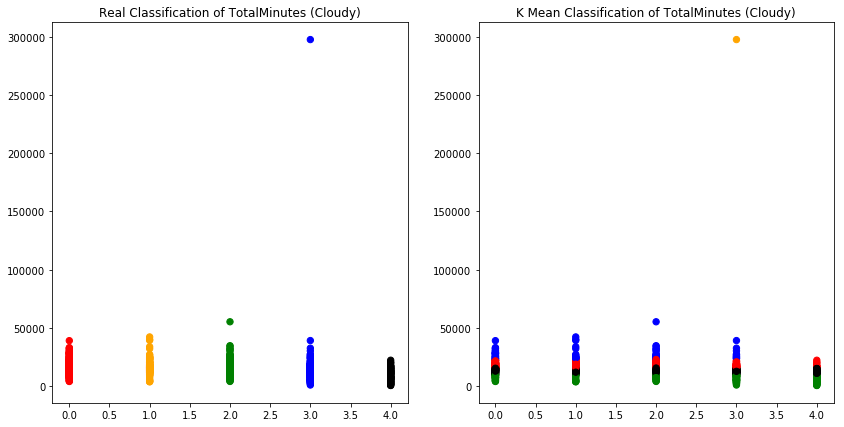

In [82]:
# This is the 2nd result of K-Means to our Real Classification but this time for Total Minutes ridden (Cloudy).

# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap (5, 1 for each states represented from 0-4. E.g.'Clear': '0', 'Little Cloudy': '1', 'Cloudy': '2', 'Very Cloudy': '3', 'Overcast': '4')
colormap = np.array(['red', 'orange', 'green', 'blue', 'black'])

# Plot the Original Classifications for TotalMinutes
plt.subplot(1, 2, 1)
plt.scatter(y.CloudDesc, x.TotalMinutes, c=colormap[y.CloudDesc], s=40)
plt.title('Real Classification of TotalMinutes (Cloudy)')

# Plot the Models Classifications for TotalMinutes
plt.subplot(1, 2, 2)
plt.scatter(y.CloudDesc, x.TotalMinutes, c=colormap[model.labels_], s=40)
plt.title('K Mean Classification of TotalMinutes (Cloudy)')